### Imports

In [ ]:
import nltk
nltk.download('stopwords')

from collections import defaultdict
from array import array
import time
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import pandas as pd



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##**Lab1**

### parte1

In [ ]:
#elimina emojis del texto
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # Emojis in Emoticons
                           u"\U0001F300-\U0001F5FF"  # Emojis in Miscellaneous Symbols and Pictographs
                           u"\U0001F680-\U0001F6FF"  # Emojis in Transport and Map Symbols
                           u"\U0001F700-\U0001F77F"  # Emojis in Alphabetic Presentation Forms
                           u"\U0001F780-\U0001F7FF"  # Emojis in Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Emojis in Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Emojis in Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Emojis in Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Emojis in Symbols and Pictographs Extended-A
                           u"\U0001F004-\U0001F0CF"  # Mahjong Tiles
                           u"\U0001F170-\U0001F251"  # Emojis in Enclosed Alphanumeric Supplement
                           "]+", flags=re.UNICODE)

    # Remove emojis from the text
    return emoji_pattern.sub(r'', text)

In [ ]:
#Extraemos la informacion total del tweet
def extract_tweet_info(tweet):
    tweet_id = tweet.get("id_str", "N/A")
    tweet_text = tweet.get("full_text", "N/A")
    created_at = tweet.get("created_at", "N/A")
    hashtags = ", ".join([ht["text"] for ht in tweet.get("entities", {}).get("hashtags", [])])
    likes = tweet.get("favorite_count", 0)
    retweets = tweet.get("retweet_count", 0)
    url = f"https://twitter.com/{tweet['user']['screen_name']}/status/{tweet['id_str']}"


    return [tweet_id, tweet_text, created_at, hashtags, likes, retweets, url]



In [ ]:
#formatted_tweet tendra los tweets de Rus_Ukr_war_data.json
docs_path = 'Rus_Ukr_war_data.json'
formatted_tweets = []
with open(docs_path, 'r') as fp:
    for line in fp:
        try:
            tweet_data = json.loads(line)
            formatted_tweet = extract_tweet_info(tweet_data)
            formatted_tweets.append(formatted_tweet)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

In [ ]:
#Numero total de tweets
len(formatted_tweets)

4000

In [ ]:
#Tweet de ejemplo
formatted_tweets[2]

['1575917992390823936',
 'ALERT 🚨Poland preps anti-radiation tablets over nuclear threat\n\n#NATO #Putin #Russia #RussiaInvadedUkraine #Ukraine #UkraineRussiaWar',
 'Fri Sep 30 18:38:23 +0000 2022',
 'NATO, Putin, Russia, RussiaInvadedUkraine, Ukraine, UkraineRussiaWar',
 0,
 0,
 'https://twitter.com/NEWS_ALL_TIME/status/1575917992390823936']

In [ ]:
tweets_dictionary = {}

for tweet in formatted_tweets:
    clave = tweet[0]
    valor = tweet[1:]
    tweets_dictionary[clave] = valor
print(tweets_dictionary["1575917992390823936"])

['ALERT 🚨Poland preps anti-radiation tablets over nuclear threat\n\n#NATO #Putin #Russia #RussiaInvadedUkraine #Ukraine #UkraineRussiaWar', 'Fri Sep 30 18:38:23 +0000 2022', 'NATO, Putin, Russia, RussiaInvadedUkraine, Ukraine, UkraineRussiaWar', 0, 0, 'https://twitter.com/NEWS_ALL_TIME/status/1575917992390823936']


In [ ]:
def build_terms(line):
    """
    Preprocess the article text (title + body) removing stop words, stemming,
    transforming in lowercase and return the tokens of the text.

    Argument:
    line -- string (text) to be preprocessed

    Returns:
    line - a list of tokens corresponding to the input text after the preprocessing
    """

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))

    line=  line.lower() ## Transform in lowercase
    line=  remove_emojis(line)
    line=  line.split() ## Tokenize the text to get a list of terms
    line= [x for x in line if x not in stop_words]  ##eliminate the stopwords (HINT: use List Comprehension)
    line= [stemmer.stem(x) for x in line] ## perform stemming (HINT: use List Comprehension)

    return line

In [ ]:
docs_path = 'Rus_Ukr_war_data_ids.csv'
with open(docs_path) as fp:
    csvlines = fp.readlines()

Diccionario_Num2ID = {}

for linea in csvlines:
    partes = linea.strip().split('\t')
    if len(partes) == 2:
        Diccionario_Num2ID[partes[1]] = partes[0]
print(Diccionario_Num2ID)

{'1575918221013979136': 'doc_1', '1575918081461080065': 'doc_2', '1575917992390823936': 'doc_3', '1575917907774967809': 'doc_4', '1575917878410301441': 'doc_5', '1575917759707299841': 'doc_6', '1575917751360593920': 'doc_7', '1575917748978434053': 'doc_8', '1575917670049857538': 'doc_9', '1575917624298307585': 'doc_10', '1575916840286507009': 'doc_11', '1575916494990417920': 'doc_12', '1575916461620690977': 'doc_13', '1575916233102217217': 'doc_14', '1575915883385409537': 'doc_15', '1575915806319427621': 'doc_16', '1575915601012281344': 'doc_17', '1575915581278420992': 'doc_18', '1575915545869750272': 'doc_19', '1575915251169574912': 'doc_20', '1575915211336605698': 'doc_21', '1575915151890399232': 'doc_22', '1575914957362712576': 'doc_23', '1575914711388139520': 'doc_24', '1575914586791763968': 'doc_25', '1575914563886727169': 'doc_26', '1575914279295156224': 'doc_27', '1575914207052283925': 'doc_28', '1575914059031101452': 'doc_29', '1575913989195718657': 'doc_30', '15759138619573698

In [ ]:
tweets_relevant = []
for t in formatted_tweets:
    relevant_info = []
    relevant_info.append(Diccionario_Num2ID[t[0]])
    relevant_info.append(build_terms(t[1]))
    tweets_relevant.append(relevant_info)

'''for t in tweets_relevant:
  for w in t[-1]:
      if "#" in w and w[1:] not in t:
          t[-1].append(w[1:])'''

'for t in tweets_relevant:\n  for w in t[-1]:\n      if "#" in w and w[1:] not in t:\n          t[-1].append(w[1:])'

In [ ]:
print(formatted_tweets[2])
print(tweets_relevant[2])

#formated tweet: Tweet |Date | Hashtags | Likes | Retweets | Url | relevantwords

['1575917992390823936', 'ALERT 🚨Poland preps anti-radiation tablets over nuclear threat\n\n#NATO #Putin #Russia #RussiaInvadedUkraine #Ukraine #UkraineRussiaWar', 'Fri Sep 30 18:38:23 +0000 2022', 'NATO, Putin, Russia, RussiaInvadedUkraine, Ukraine, UkraineRussiaWar', 0, 0, 'https://twitter.com/NEWS_ALL_TIME/status/1575917992390823936']
['doc_3', ['alert', 'poland', 'prep', 'anti-radi', 'tablet', 'nuclear', 'threat', '#nato', '#putin', '#russia', '#russiainvadedukrain', '#ukrain', '#ukrainerussiawar']]


In [ ]:
def create_index(lines):
    """
    Implement the inverted index

    Argument:
    lines -- collection of Wikipedia articles

    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of documents where these keys appears in (and the positions) as values.
    """
    index = defaultdict(list)

    for line_arr in lines:  # Remember, lines contain all documents: article-id | article-title | article-body

        page_id = line_arr[0]
        terms = line_arr[1] # page_title + page_text
        relevant_words = line_arr[1]

        ## ===============================================================
        ## create the index for the current page and store it in current_page_index (current_page_index)
        ## current_page_index ==> { ‘term1’: [current_doc, [list of positions]], ...,‘term_n’: [current_doc, [list of positions]]}

        ## Example: if the curr_doc has id 1 and his text is
        ##"web retrieval information retrieval":

        ## current_page_index ==> { ‘web’: [1, [0]], ‘retrieval’: [1, [1,4]], ‘information’: [1, [2]]}

        ## the term ‘web’ appears in document 1 in positions 0,
        ## the term ‘retrieval’ appears in document 1 in positions 1 and 4
        ## ===============================================================

        current_page_index = {}

        for position, term in enumerate(terms): # terms contains page_title + page_text. Loop over all terms
            try:
                # if the term is already in the index for the current page (current_page_index)
                # append the position to the corresponding list


                current_page_index[term][page_id].append(position)
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index[term]=[page_id, array('I',[position])] #'I' indicates unsigned int (int in Python)

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)



    return index

In [ ]:
index = create_index(tweets_relevant)

In [ ]:
def search(query, index):
    """
    The output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query)
    docs = set()
    for term in query:
    ## START DODE
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs=[posting[0] for posting in index[term]]
            # docs = docs Union term_docs
            docs = docs.union(set(term_docs))
        except:
            #term is not in index
            pass
    docs = list(docs)
    return docs

In [ ]:
print(len(search("putin", index)))

239


In [ ]:
docs_path = 'Rus_Ukr_war_data_ids.csv'
with open(docs_path) as fp:
    csvlines = fp.readlines()


resultado_diccionarios = {}
for linea in csvlines:
    partes = linea.strip().split('\t')
    if len(partes) == 2:
        resultado_diccionarios[partes[0]] = partes[1]

print(resultado_diccionarios)

{'doc_1': '1575918221013979136', 'doc_2': '1575918081461080065', 'doc_3': '1575917992390823936', 'doc_4': '1575917907774967809', 'doc_5': '1575917878410301441', 'doc_6': '1575917759707299841', 'doc_7': '1575917751360593920', 'doc_8': '1575917748978434053', 'doc_9': '1575917670049857538', 'doc_10': '1575917624298307585', 'doc_11': '1575916840286507009', 'doc_12': '1575916494990417920', 'doc_13': '1575916461620690977', 'doc_14': '1575916233102217217', 'doc_15': '1575915883385409537', 'doc_16': '1575915806319427621', 'doc_17': '1575915601012281344', 'doc_18': '1575915581278420992', 'doc_19': '1575915545869750272', 'doc_20': '1575915251169574912', 'doc_21': '1575915211336605698', 'doc_22': '1575915151890399232', 'doc_23': '1575914957362712576', 'doc_24': '1575914711388139520', 'doc_25': '1575914586791763968', 'doc_26': '1575914563886727169', 'doc_27': '1575914279295156224', 'doc_28': '1575914207052283925', 'doc_29': '1575914059031101452', 'doc_30': '1575913989195718657', 'doc_31': '1575913

### Parte 2

In [ ]:
#word counting distribution
def procesar_diccionario(diccionario):
    salida = []
    for clave in list(diccionario.keys()):
        entrada = clave
        num_elementos_lista = len(diccionario[clave])
        salida.append([entrada, num_elementos_lista])
    return salida
repeticiones_palabras = procesar_diccionario(index)
print(repeticiones_palabras)

[['@melsimmonsfcdo', 1], ['wrong.', 2], ['dictat', 6], ["putin'", 61], ['fascist', 8], ['russia', 369], ['intend', 5], ['conquer', 2], ['much', 26], ['ukrainian', 418], ['land', 51], ['possible.', 4], ['#russiainvadesukrain', 6], ['#ukrainerussiawar', 3841], ['❤️', 8], ['arm', 102], ['forc', 237], ['liber', 44], ['villag', 12], ['#drobyshev', 5], ['#lymansk', 1], ['urban', 2], ['territori', 122], ['commun', 13], ['#donetsk', 85], ['region.#ukrainerussiawar', 1], ['#ukrainewar', 1220], ['#ukraine️', 233], ['#ukrainewillwin', 177], ['#ukrainianarmi', 173], ['#ukrainecounteroffens', 93], ['#ukrainewarnew', 254], ['#slavaukraïni', 60], ['#standwithukrain', 233], ['https://t.co/ifg0rxdmbq', 1], ['alert', 7], ['poland', 13], ['prep', 1], ['anti-radi', 1], ['tablet', 1], ['nuclear', 98], ['threat', 28], ['#nato', 437], ['#putin', 500], ['#russia', 1169], ['#russiainvadedukrain', 172], ['#ukrain', 1971], ['i’m', 8], ['still', 34], ['wait', 19], ['googl', 1], ['map', 21], ['️', 25], ['updat', 2

In [ ]:
def sentence_length(tweets):
    salida = []
    for tweet in tweets:
        salida.append(len(tweet[1]))
    print(tweets[np.argmax(salida)])
    return salida
length_all_sentences = sentence_length(tweets_relevant)
print(length_all_sentences)

['doc_2332', ['@emmamashford', '@soonergrunt', '@canadanato', '@canadafp', '@cafinukrain', '@canembukrain', '@whnsc', '@usembassykyiv', '@stephenwalt', '@cbcchrisbrown', '@grayconnolli', '@lawdavf', '@navalhistorian', '@wethebrandon', '@justinmassie1', '@jdcushman', '@osc', '@usosc', '@nato', '@lievenanatol', '@ralee85', '@briarstewart', '@drradchenko', '@cafreeland', '@melaniejoli', '@20committe', '@ereguli', '@anitaanandmp', '@milnews_ca', '@efpbglatvia', '@adam_tooz', '@stevenchas', '@ameliairheart', '@mrfrantarelli', '@kaptainloma', '@cfoper', '@murray_brewst', '@nukestrat', '@caf_colleg', '@cafineurop', '@nationaldef', '@privycouncilca', '@markmackinnon', '@janicedickson', '@hrw', '@unicef', '@crisisgroup', '#russianukrainianwar:', '@mattgurney', 'think', 'previous', 'unthink', 'thing', 'https://t.co/vfegtsubvh', '#putin', '#russia', '#ukrainerussiawar', '#russianarmi', '#ukrain', '#nato', '#nuclearweapon', '#cdnfp']]
[14, 21, 13, 18, 13, 19, 18, 19, 16, 12, 9, 25, 27, 16, 20, 25,

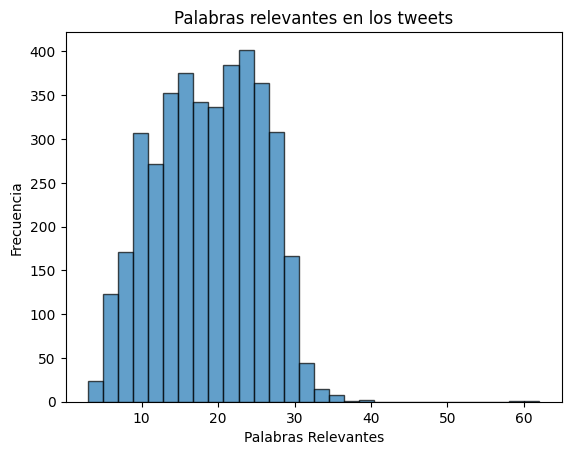

In [ ]:
# Crear un histograma
plt.hist(length_all_sentences, bins=30, edgecolor='black', alpha=0.7)  # Puedes ajustar el número de "bins" según tu preferencia

# Agregar etiquetas y título
plt.xlabel('Palabras Relevantes')
plt.ylabel('Frecuencia')
plt.title('Palabras relevantes en los tweets')

# Mostrar el histograma
plt.show()

In [ ]:
#Total number or words
print(len(index.keys()))

16573


In [ ]:
#most liked tweets
formatted_tweets
def most_liked_tweets(formatted_tweets, N_top):
  formatted_tweets = sorted(formatted_tweets, key=lambda x: x[-3],reverse=True)
  return formatted_tweets[:N_top]
most_liked_tweets(formatted_tweets,3)


[['1575775162674212865',
  '🗺️Situation around Lyman - Sep 30 11:00:\n- UA forces liberated Yampil and advancing north\n- RU troops are reportedly abandoning its positions in Drobysheve\n- The only exit route from Lyman is within the firing range of UA forces\n#UkraineRussiaWar https://t.co/jGJUhXcr1y',
  'Fri Sep 30 09:10:49 +0000 2022',
  'UkraineRussiaWar',
  3701,
  646,
  'https://twitter.com/Militarylandnet/status/1575775162674212865'],
 ['1575396903252025351',
  "📷Unique and rare photos of Ukrainian forward command post during the offensive in #Kharkiv Oblast. News reporters aren't usually invited to such places, but here seems to be an exception.\n#UkraineRussiaWar https://t.co/AmSijyM59c",
  'Thu Sep 29 08:07:45 +0000 2022',
  'Kharkiv, UkraineRussiaWar',
  2685,
  338,
  'https://twitter.com/Militarylandnet/status/1575396903252025351'],
 ['1575181552170201088',
  '📽️Operation Interflex: Ukrainian recruits continue to master their skills under the guidance of British and Canad

In [ ]:
#most retweeted tweets
formatted_tweets
def most_retweeted_tweets(formatted_tweets, N_top):
  formatted_tweets = sorted(formatted_tweets, key=lambda x: x[-2],reverse=True)
  return formatted_tweets[:N_top]
most_retweeted_tweets(formatted_tweets,3)

[['1575775162674212865',
  '🗺️Situation around Lyman - Sep 30 11:00:\n- UA forces liberated Yampil and advancing north\n- RU troops are reportedly abandoning its positions in Drobysheve\n- The only exit route from Lyman is within the firing range of UA forces\n#UkraineRussiaWar https://t.co/jGJUhXcr1y',
  'Fri Sep 30 09:10:49 +0000 2022',
  'UkraineRussiaWar',
  3701,
  646,
  'https://twitter.com/Militarylandnet/status/1575775162674212865'],
 ['1575396903252025351',
  "📷Unique and rare photos of Ukrainian forward command post during the offensive in #Kharkiv Oblast. News reporters aren't usually invited to such places, but here seems to be an exception.\n#UkraineRussiaWar https://t.co/AmSijyM59c",
  'Thu Sep 29 08:07:45 +0000 2022',
  'Kharkiv, UkraineRussiaWar',
  2685,
  338,
  'https://twitter.com/Militarylandnet/status/1575396903252025351'],
 ['1575181552170201088',
  '📽️Operation Interflex: Ukrainian recruits continue to master their skills under the guidance of British and Canad

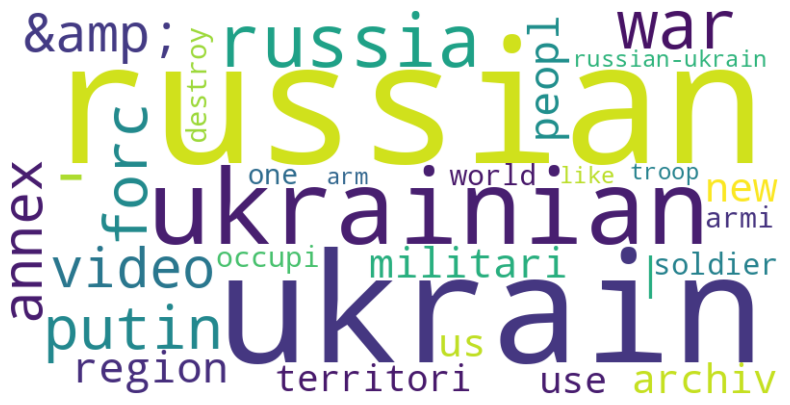

-------------------------------------------------------------------------------------------------------


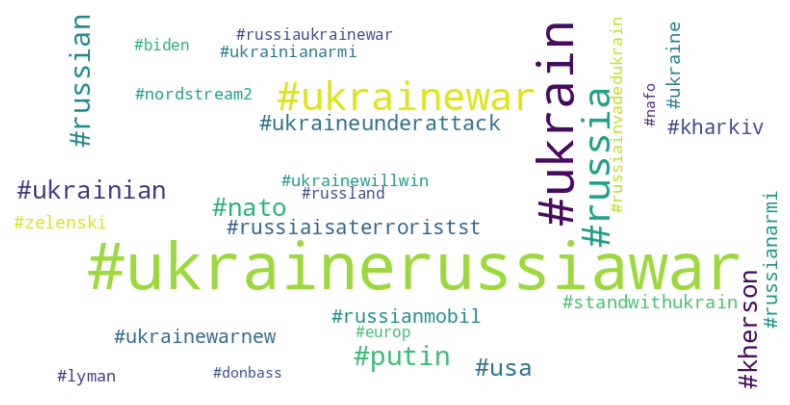

-------------------------------------------------------------------------------------------------------


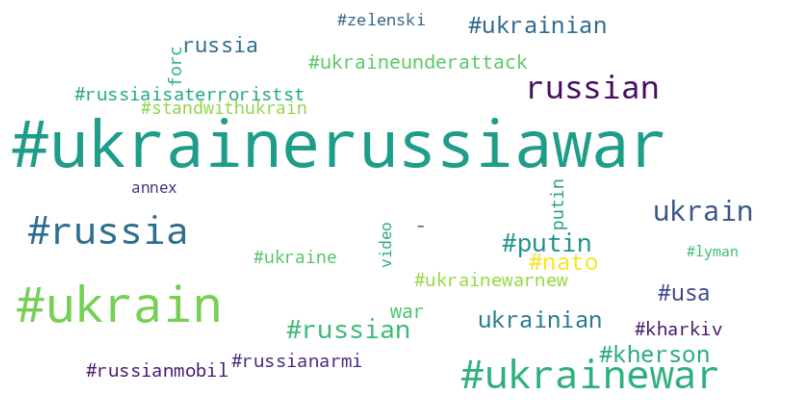

In [ ]:

repeticiones_palabras
#mode= nohashtag, hashtag, all
def word_cloud(repeticiones, Ntop = 30, mode = "All"):
  if mode == 'nohashtag':
    repeticiones = [[palabra, frecuencia] for palabra, frecuencia in repeticiones if not palabra.startswith('#')]
  elif mode == 'hashtag':
    repeticiones = [[palabra, frecuencia] for palabra, frecuencia in repeticiones if palabra.startswith('#')]
  top_100_palabras = sorted(repeticiones, key=lambda x: x[1], reverse=True)[:Ntop]
  word_freq = {}
  for palabra, frecuencia in top_100_palabras:
      if palabra in word_freq:
          word_freq[palabra] += frecuencia
      else:
          word_freq[palabra] = frecuencia

  # Crear un objeto WordCloud
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

  # Paso 3: Crear y mostrar la nube de palabras
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
word_cloud(repeticiones_palabras, 30, 'nohashtag')
print('-------------------------------------------------------------------------------------------------------')
word_cloud(repeticiones_palabras, 30, 'hashtag')
print('-------------------------------------------------------------------------------------------------------')
word_cloud(repeticiones_palabras, 30)

In [ ]:
docs_path = 'Rus_Ukr_war_data_ids.csv'
with open(docs_path) as fp:
    csvlines = fp.readlines()

In [ ]:
print("Total number of Wikipedia articles in the corpus: {}".format(len(csvlines)))

Total number of Wikipedia articles in the corpus: 4000


## **Lab2**


#### parte1

In [ ]:
def TF_IDF_INDEX(lines,num_documents):
    """
    Implement the inverted index

    Argument:
    lines -- collection of Wikipedia articles

    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of documents where these keys appears in (and the positions) as values.
    """
    index = defaultdict(list)
    tf = defaultdict(list)
    df = defaultdict(int)  # document frequencies of terms in the corpus
    title_index = defaultdict(str)
    idf = defaultdict(float)
    for line_arr in lines:  # Remember, lines contain all documents: article-id | article-title | article-body

        page_id = line_arr[0]
        terms = line_arr[1] # page_title + page_text
        relevant_words = line_arr[1]

        ## ===============================================================
        ## create the index for the current page and store it in current_page_index (current_page_index)
        ## current_page_index ==> { ‘term1’: [current_doc, [list of positions]], ...,‘term_n’: [current_doc, [list of positions]]}

        ## Example: if the curr_doc has id 1 and his text is
        ##"web retrieval information retrieval":

        ## current_page_index ==> { ‘web’: [1, [0]], ‘retrieval’: [1, [1,4]], ‘information’: [1, [2]]}

        ## the term ‘web’ appears in document 1 in positions 0,
        ## the term ‘retrieval’ appears in document 1 in positions 1 and 4
        ## ===============================================================

        current_page_index = {}

        for position, term in enumerate(terms): # terms contains page_title + page_text. Loop over all terms
            try:
                # if the term is already in the index for the current page (current_page_index)
                # append the position to the corresponding list


                current_page_index[term][page_id].append(position)
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index[term]=[page_id, array('I',[position])] #'I' indicates unsigned int (int in Python)

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)

        #normalize term frequencies
        # Compute the denominator to normalize term frequencies (formula 2 above)
        # norm is the same for all terms of a document.
        norm = 0
        for term, posting in current_page_index.items():
            # posting will contain the list of positions for current term in current document.
            # posting ==> [current_doc, [list of positions]]
            # you can use it to infer the frequency of current term.
            norm += len(posting[1]) ** 2
        norm = math.sqrt(norm)

        # calculate the tf(dividing the term frequency by the above computed norm) and df weights
        for term, posting in current_page_index.items():
            # append the tf for current term (tf = term frequency in current doc/norm)
            tf[term].append(np.round(len(posting[1])/norm,4)) ## SEE formula (1) above
            #increment the document frequency of current term (number of documents containing the current term)
            df[term] += 1 # increment DF for current term

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)

        # Compute IDF following the formula (3) above. HINT: use np.log
        for term in df:
            idf[term] = np.round(np.log(float(num_documents/df[term]+1)), 4)

    return tf, df, idf, title_index


In [ ]:
tf, df, idf, title_index = TF_IDF_INDEX(tweets_relevant,len(tweets_relevant))

In [ ]:
def rank_documents(terms, docs, index, idf, tf, title_index):
    """
    Perform the ranking of the results of a search based on the tf-idf weights

    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between page id and page title

    Returns:
    Print the list of ranked documents
    """

    # I'm interested only on the element of the docVector corresponding to the query terms
    # The remaining elements would became 0 when multiplied to the query_vector
    doc_vectors = defaultdict(lambda: [0] * len(terms)) # I call doc_vectors[k] for a nonexistent key k, the key-value pair (k,[0]len(terms)) will be automatically added to the dictionary
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query.
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})
    # HINT: use when computing tf for query_vector

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        ## Compute tfidf(normalize TF as done with documents)
        query_vector[termIndex]=(query_terms_count[term]/query_norm) * idf[term]
        #Generate doc_vectors for matching docs
        for doc_index, (doc, postings) in enumerate(index[term]):
            # Example of [doc_index, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....

            #tf[term][0] will contain the tf of the term "term" in the doc 26A
            if doc in docs:
                doc_vectors[doc][termIndex] = tf[term][doc_index] * idf[term]  # TODO: check if multiply for idf

    # Calculate the score of each doc
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine similarity
    # see np.dot

    doc_scores=[[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items()]
    score = doc_scores
    doc_scores.sort(reverse=True)
    result_docs = [x[1] for x in doc_scores]
    #print document titles instead if document id's
    #result_docs=[ title_index[x] for x in result_docs ]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index, idf, tf, title_index)
    #print ('\n'.join(result_docs), '\n')
    return result_docs, score

In [ ]:
def search_tf_idf(query, index, idf, tf, title_index):
    """
    output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query)
    docs = set()
    for term in query:
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs=[posting[0] for posting in index[term]]

            # docs = docs Union term_docs
            docs = docs.union(term_docs)
        except:
            #term is not in index
            pass
    docs = list(docs)
    ranked_docs, doc_scores = rank_documents(query, docs, index, idf, tf, title_index)

    return ranked_docs, doc_scores

In [ ]:

queries = []
queries.append("which city is under attack")        #we create our 5 queries
queries.append("ukraine soldiers fighting")
queries.append("tank destroy video")
queries.append("usa send aid")
queries.append("EU sanctions")

for query in queries:
  ranked_docs,_ = search_tf_idf(query, index, idf, tf, title_index)
  top = 10

  print("\n\n\n==========================================================\nTop {} results out of {} for the searched query {}:\n".format(top, len(ranked_docs), query))



  for d_id in ranked_docs[:top]:
      tweet_id = resultado_diccionarios[d_id]
      print("--> page_id= {} - tweet: {}".format(d_id, tweets_dictionary[tweet_id][0]))
      #print(d_id)




Top 10 results out of 155 for the searched query which city is under attack:

--> page_id= doc_1566 - tweet: Just imagine this being in your city
#Thursday #UkraineRussiaWar https://t.co/GfS7Gm44hF
--> page_id= doc_1560 - tweet: Ukrainian troops put the city of Lyman into an envelope. They can soon attack this area from the rear. 
Matthew 24:6 - Wars 
#UkraineRussiaWar  
https://t.co/frorlgmLeL
--> page_id= doc_1188 - tweet: Ukrainian officials say 25 people have been killed and 28 injured in a horrific attack by Russian forces on a convoy leaving the city of Zaporizhzhia. All are civilians - @suspilne_news #Ukraine #UkraineRussiaWar https://t.co/JXn9BTNI1k
--> page_id= doc_2161 - tweet: Today #Russians attacked city of #Dnepr with X22 missiles (1000kg warhead, very inaccurate). As usual the rockets hit residential buildings...

Here is how locals describe it (translated into English):

1/2

#Ukraine️ #UkraineRussianWar #UkraineRussiaWar #RussiaIsATerroristState https://t.co/OCIlFRI

### Parte2


In [ ]:
docs_path = 'Evaluation_gt.csv'
with open(docs_path) as fp:
    csvlines = fp.readlines()

Evaluation =  []
Ev_dic = {}
for linea in csvlines[1:]:
    partes = linea.strip().split(',')
    if len(partes) == 3:
        Evaluation.append(partes)
        Ev_dic[partes[0]] =[partes[1],partes[2]]
print(Evaluation)
print(Ev_dic)

evdf = pd.DataFrame(Evaluation)

evdf.columns = ['doc_id', 'query_id','doc_score']
evdf = evdf[['query_id','doc_id', 'doc_score']]
evdf['query_id'] = evdf['query_id'].str.replace('Q', '').astype(int)
evdf['doc_score'] = evdf['doc_score'].astype(int)

[['doc_2052', 'Q3', '1'], ['doc_164', 'Q3', '1'], ['doc_411', 'Q3', '1'], ['doc_1805', 'Q3', '1'], ['doc_3442', 'Q3', '1'], ['doc_2657', 'Q3', '1'], ['doc_1534', 'Q3', '1'], ['doc_383', 'Q3', '1'], ['doc_1618', 'Q3', '1'], ['doc_63', 'Q3', '1'], ['doc_3803', 'Q3', '0'], ['doc_1069', 'Q3', '0'], ['doc_2852', 'Q3', '0'], ['doc_3445', 'Q3', '0'], ['doc_421', 'Q3', '0'], ['doc_3478', 'Q3', '0'], ['doc_3705', 'Q3', '0'], ['doc_3422', 'Q3', '0'], ['doc_650', 'Q3', '0'], ['doc_2442', 'Q3', '0'], ['doc_1452', 'Q2', '1'], ['doc_2908', 'Q2', '1'], ['doc_618', 'Q2', '1'], ['doc_2677', 'Q2', '1'], ['doc_489', 'Q2', '1'], ['doc_110', 'Q2', '1'], ['doc_3439', 'Q2', '1'], ['doc_3137', 'Q2', '1'], ['doc_3913', 'Q2', '1'], ['doc_2696', 'Q2', '1'], ['doc_1933', 'Q2', '0'], ['doc_3326', 'Q2', '0'], ['doc_1095', 'Q2', '0'], ['doc_2164', 'Q2', '0'], ['doc_3146', 'Q2', '0'], ['doc_3297', 'Q2', '0'], ['doc_243', 'Q2', '0'], ['doc_477', 'Q2', '0'], ['doc_2457', 'Q2', '0'], ['doc_3967', 'Q2', '0'], ['doc_2234'

In [ ]:
evdf

query_id    doc_id  doc_score
0          3  doc_2052          1
1          3   doc_164          1
2          3   doc_411          1
3          3  doc_1805          1
4          3  doc_3442          1
5          3  doc_2657          1
6          3  doc_1534          1
7          3   doc_383          1
8          3  doc_1618          1
9          3    doc_63          1
10         3  doc_3803          0
11         3  doc_1069          0
12         3  doc_2852          0
13         3  doc_3445          0
14         3   doc_421          0
15         3  doc_3478          0
16         3  doc_3705          0
17         3  doc_3422          0
18         3   doc_650          0
19         3  doc_2442          0
20         2  doc_1452          1
21         2  doc_2908          1
22         2   doc_618          1
23         2  doc_2677          1
24         2   doc_489          1
25         2   doc_110          1
26         2  doc_3439          1
27         2  doc_3137          1
28         2  doc_3913          1
29         2  doc_2696          1
30         2  doc_1933          0
31         2  doc_3326          0
32         2  doc_1095          0
33         2  doc_2164          0
34         2  doc_3146          0
35         2  doc_3297          0
36         2   doc_243          0
37         2   doc_477          0
38         2  doc_2457          0
39         2  doc_3967          0
40         1  doc_2234          1
41         1  doc_2656          1
42         1  doc_3709          1
43         1   doc_592          1
44         1  doc_3556          1
45         1  doc_2586          1
46         1  doc_2701          1
47         1  doc_3478          1
48         1  doc_2956          1
49         1  doc_3552          1
50         1  doc_1336          0
51         1  doc_2295          0
52         1  doc_2176          0
53         1  doc_2488          0
54         1  doc_1669          0
55         1  doc_1953          0
56         1  doc_1641          0
57         1   doc_637          0
58         1   doc_885          0
59         1   doc_174          0

In [ ]:
docsQ1 = []
docsQ2 = []
docsQ3 = []
for doc in Evaluation:
  if doc[1] == "Q1":
    docsQ1.append(doc[0])
  if doc[1] == "Q2":
    docsQ2.append(doc[0])
  if doc[1] == "Q3":
    docsQ3.append(doc[0])
print(docsQ1)


['doc_2234', 'doc_2656', 'doc_3709', 'doc_592', 'doc_3556', 'doc_2586', 'doc_2701', 'doc_3478', 'doc_2956', 'doc_3552', 'doc_1336', 'doc_2295', 'doc_2176', 'doc_2488', 'doc_1669', 'doc_1953', 'doc_1641', 'doc_637', 'doc_885', 'doc_174']


In [ ]:
subset1 = [e for e in tweets_relevant if e[0] in docsQ1]
index1 = create_index(subset1)
tf1, df1, idf1, title_index1 = TF_IDF_INDEX(subset1,len(subset1))

subset2 = [e for e in tweets_relevant if e[0] in docsQ2]
index2 = create_index(subset2)
tf2, df2, idf2, title_index2 = TF_IDF_INDEX(subset2,len(subset2))

subset3 = [e for e in tweets_relevant if e[0] in docsQ3]
index3 = create_index(subset3)
tf3, df3, idf3, title_index3 = TF_IDF_INDEX(subset3,len(subset3))

In [ ]:

queries = []
queries.append("tank Kharkiv")
queries.append("Nord Stream")
queries.append("annexation region")
docs = [docsQ1, docsQ2, docsQ3]
for number, query in enumerate(queries):
  subset = [e for e in tweets_relevant if e[0] in docs[number]]
  index = create_index(subset)
  tf, df, idf, title_index = TF_IDF_INDEX(subset,len(subset))
  ranked_docs,_ = search_tf_idf(query, index, idf, tf, title_index)
  top = 10



  q = []
  for doc in ranked_docs:
    q.append([number +1, doc, 1])



  for doc in docs[number]:
    if doc not in ranked_docs:
      q.append([number +1, doc, 0])

  if number == 0:
    predG_df = pd.DataFrame(q)
    predG_df.columns = ['query_id','doc_id', 'doc_score']
  else:
    temp_df = pd.DataFrame(q)
    temp_df.columns = ['query_id','doc_id', 'doc_score']
    predG_df =  pd.concat([predG_df,temp_df], ignore_index=True)



  print("\n\n\n==========================================================\nTop {} results out of {} for the searched query {}:\n".format(top, len(ranked_docs), query))



  for d_id in ranked_docs[:top]:
      tweet_id = resultado_diccionarios[d_id]
      print("--> is Relevant: {} page_id= {} - tweet: {}".format(Ev_dic[d_id], d_id, tweets_dictionary[tweet_id][0]))





Top 10 results out of 12 for the searched query tank Kharkiv:

--> is Relevant: ['Q1', '1'] page_id= doc_2234 - tweet: Destroyed Ukrainian tank in the Kharkiv region.

#Ukraine #Ukrainewar #UkraineRussiaWar #Kharkiv https://t.co/xt4JVrWchP
--> is Relevant: ['Q1', '1'] page_id= doc_592 - tweet: 👏Footage of a Russian tank being knocked out by Ukrainian forces in Ol'hivka, Kharkiv Oblast.
#Russian #Russia #Ukraine #Ukrainian #UkraineWar #UkraineRussiaWar #RussiaIsATerroristStateR https://t.co/YMADdnvXWQ
--> is Relevant: ['Q1', '1'] page_id= doc_3478 - tweet: Russian troops hit manufacturing workshops of an armoured vehicle plant near Kharkiv that storaged over 90 tanks and other vehicles of the AFU.
Also, a vehicle repairing point at EnergoMekhKomplekt plant was hit in  Zaporizhye, Russian MoD

#Ukraine #Ukrainewar #UkraineRussiaWar https://t.co/2ECjOgXZuK
--> is Relevant: ['Q1', '0'] page_id= doc_1336 - tweet: #Ukraine's Kraken working.
Minus #Russian tank 

#UkraineRussiaWar https://

In [ ]:
predG_df

query_id    doc_id  doc_score
0          1  doc_2234          1
1          1   doc_592          1
2          1  doc_3478          1
3          1  doc_1336          1
4          1  doc_2176          1
5          1  doc_2701          1
6          1  doc_2656          1
7          1  doc_3709          1
8          1  doc_2956          1
9          1  doc_3552          1
10         1  doc_3556          1
11         1  doc_2586          1
12         1  doc_2295          0
13         1  doc_2488          0
14         1  doc_1669          0
15         1  doc_1953          0
16         1  doc_1641          0
17         1   doc_637          0
18         1   doc_885          0
19         1   doc_174          0
20         2   doc_618          1
21         2  doc_3439          1
22         2  doc_2677          1
23         2   doc_489          1
24         2  doc_3913          1
25         2  doc_3137          1
26         2  doc_2908          1
27         2  doc_1452          1
28         2   doc_110          1
29         2  doc_2696          1
30         2  doc_1933          0
31         2  doc_3326          0
32         2  doc_1095          0
33         2  doc_2164          0
34         2  doc_3146          0
35         2  doc_3297          0
36         2   doc_243          0
37         2   doc_477          0
38         2  doc_2457          0
39         2  doc_3967          0
40         3   doc_164          1
41         3   doc_411          1
42         3   doc_383          1
43         3  doc_3442          1
44         3  doc_2052          1
45         3  doc_1805          1
46         3  doc_1618          1
47         3  doc_1534          1
48         3    doc_63          1
49         3  doc_2657          1
50         3  doc_3803          0
51         3  doc_1069          0
52         3  doc_2852          0
53         3  doc_3445          0
54         3   doc_421          0
55         3  doc_3478          0
56         3  doc_3705          0
57         3  doc_3422          0
58         3   doc_650          0
59         3  doc_2442          0

In [ ]:
city_under_attack = ["doc_1560",  "doc_1188", "doc_2161",  "doc_2925", "doc_2749", "doc_111", "doc_2091","doc_846", "doc_3257", "doc_539"]
ukr_soldiers_figthing = ["doc_2838", "doc_3188",  "doc_1643", "doc_2636", "doc_860", "doc_3375", "doc_1563", "doc_403", "doc_3507", "doc_1179"]
tank_destroy_video = ["doc_2186", "doc_257", "doc_1015", "doc_1004", "doc_2498", "doc_739", "doc_336", "doc_2234", "doc_1235", "doc_781"]
usa_send_aid = ["doc_3446", "doc_3616", "doc_3796", "doc_1844", "doc_1605", "doc_2905", "doc_2773", "doc_3518", "doc_340", "doc_203"]
EU_sanctions = ["doc_3097", "doc_325", "doc_2538", "doc_2679", "doc_2496", "doc_2402", "doc_3608", "doc_315", "doc_2098", "doc_2105"]
Others = ["doc_1243", "doc_654", "doc_656", "doc_131", "doc_2308", "doc_1365", "doc_2099", "doc_1314", "doc_376", "doc_101"]

DicValues = {}
for doc in city_under_attack:
  DicValues[doc] ="1"
for doc in ukr_soldiers_figthing:
  DicValues[doc] ="2"
for doc in tank_destroy_video:
  DicValues[doc] ="3"
for doc in usa_send_aid:
  DicValues[doc] ="4"
for doc in EU_sanctions:
  DicValues[doc] ="5"
for doc in Others:
  DicValues[doc] ="0"

for doc in city_under_attack:
  DicValues[doc] ="1"
for doc in ukr_soldiers_figthing:
  DicValues[doc] ="2"
for doc in tank_destroy_video:
  DicValues[doc] ="3"
for doc in usa_send_aid:
  DicValues[doc] ="4"
for doc in EU_sanctions:
  DicValues[doc] ="5"
for doc in Others:
  DicValues[doc] ="0"

Selected_tweets = []


query1 = []
for doc in city_under_attack:
  query1.append([doc, 1])
for doc in Others:
  query1.append([doc, 0])
for doc in ukr_soldiers_figthing:
  query1.append([doc, 0])
for doc in tank_destroy_video:
  query1.append([doc, 0])

query2 = []
for doc in city_under_attack:
  query2.append([doc, 0])
for doc in Others:
  query2.append([doc, 0])
for doc in ukr_soldiers_figthing:
  query2.append([doc, 1])
for doc in tank_destroy_video:
  query2.append([doc, 0])

query3 = []
for doc in city_under_attack:
  query3.append([doc, 0])
for doc in Others:
  query3.append([doc, 0])
for doc in ukr_soldiers_figthing:
  query3.append([doc, 0])
for doc in tank_destroy_video:
  query3.append([doc, 1])


query4 = []
for doc in usa_send_aid:
  query4.append([doc, 1])
for doc in Others:
  query4.append([doc, 0])
for doc in EU_sanctions:
  query4.append([doc, 0])
for doc in tank_destroy_video:
  query4.append([doc, 0])

query5 = []
for doc in usa_send_aid:
  query5.append([doc, 0])
for doc in Others:
  query5.append([doc, 0])
for doc in EU_sanctions:
  query5.append([doc, 1])
for doc in tank_destroy_video:
  query5.append([doc, 0])

print(query2[:])
docs1 = [tupla[0] for tupla in query1]
docs2 = [tupla[0] for tupla in query2]
docs3 = [tupla[0] for tupla in query3]
docs4 = [tupla[0] for tupla in query4]
docs5 = [tupla[0] for tupla in query5]
print(docs5)
print(DicValues)

[['doc_1560', 0], ['doc_1188', 0], ['doc_2161', 0], ['doc_2925', 0], ['doc_2749', 0], ['doc_111', 0], ['doc_2091', 0], ['doc_846', 0], ['doc_3257', 0], ['doc_539', 0], ['doc_1243', 0], ['doc_654', 0], ['doc_656', 0], ['doc_131', 0], ['doc_2308', 0], ['doc_1365', 0], ['doc_2099', 0], ['doc_1314', 0], ['doc_376', 0], ['doc_101', 0], ['doc_2838', 1], ['doc_3188', 1], ['doc_1643', 1], ['doc_2636', 1], ['doc_860', 1], ['doc_3375', 1], ['doc_1563', 1], ['doc_403', 1], ['doc_3507', 1], ['doc_1179', 1], ['doc_2186', 0], ['doc_257', 0], ['doc_1015', 0], ['doc_1004', 0], ['doc_2498', 0], ['doc_739', 0], ['doc_336', 0], ['doc_2234', 0], ['doc_1235', 0], ['doc_781', 0]]
['doc_3446', 'doc_3616', 'doc_3796', 'doc_1844', 'doc_1605', 'doc_2905', 'doc_2773', 'doc_3518', 'doc_340', 'doc_203', 'doc_1243', 'doc_654', 'doc_656', 'doc_131', 'doc_2308', 'doc_1365', 'doc_2099', 'doc_1314', 'doc_376', 'doc_101', 'doc_3097', 'doc_325', 'doc_2538', 'doc_2679', 'doc_2496', 'doc_2402', 'doc_3608', 'doc_315', 'doc_

In [ ]:
sol_df1 = pd.DataFrame(query1)
sol_df1['query_id'] = 1
sol_df1.columns = ['doc_id', 'doc_score','query_id']
sol_df1 = sol_df1[['query_id','doc_id', 'doc_score']]

sol_df2 = pd.DataFrame(query2)
sol_df2['query_id'] = 2
sol_df2.columns = ['doc_id', 'doc_score','query_id']
sol_df2 = sol_df2[['query_id','doc_id', 'doc_score']]

sol_df3 = pd.DataFrame(query3)
sol_df3['query_id'] = 3
sol_df3.columns = ['doc_id', 'doc_score','query_id']
sol_df3 = sol_df3[['query_id','doc_id', 'doc_score']]

sol_df4 = pd.DataFrame(query4)
sol_df4['query_id'] = 4
sol_df4.columns = ['doc_id', 'doc_score','query_id']
sol_df4 = sol_df4[['query_id','doc_id', 'doc_score']]

sol_df5 = pd.DataFrame(query5)
sol_df5['query_id'] = 5
sol_df5.columns = ['doc_id', 'doc_score','query_id']
sol_df5 = sol_df5[['query_id','doc_id', 'doc_score']]

sol_df =  pd.concat([sol_df1, sol_df2, sol_df3, sol_df4, sol_df5], ignore_index=True)

In [ ]:
sol_df

query_id    doc_id  doc_score
0           1  doc_1560          1
1           1  doc_1188          1
2           1  doc_2161          1
3           1  doc_2925          1
4           1  doc_2749          1
..        ...       ...        ...
195         5   doc_739          0
196         5   doc_336          0
197         5  doc_2234          0
198         5  doc_1235          0
199         5   doc_781          0

[200 rows x 3 columns]

In [ ]:
docs = [docs1, docs2, docs3, docs4, docs5]
queries = []
queries.append("which city is under attack")
queries.append("ukraine soldiers fighting")
queries.append("tank destroy video")
queries.append("usa send aid")
queries.append("EU sanctions")


for Num, query in enumerate(queries):
  subset = [e for e in tweets_relevant if e[0] in docs[Num]]
  index = create_index(subset)
  tf, df, idf, title_index = TF_IDF_INDEX(subset,len(subset))
  ranked_docs, doc_score = search_tf_idf(query, index, idf, tf, title_index)
  top = 10


  q = []
  for doc in ranked_docs:
    q.append([Num +1, doc, 1])



  for doc in docs[Num]:
    if doc not in ranked_docs:
      q.append([Num +1, doc, 0])

  if Num == 0:
    pred_df = pd.DataFrame(q)
    pred_df.columns = ['query_id','doc_id', 'doc_score']
  else:
    temp_df = pd.DataFrame(q)
    temp_df.columns = ['query_id','doc_id', 'doc_score']
    pred_df =  pd.concat([pred_df,temp_df], ignore_index=True)



  print("\n\n\n==========================================================\nTop {} results out of {} for the searched query {}:\n".format(top, len(ranked_docs), query))



  for number, d_id in enumerate(ranked_docs[:top]):
      tweet_id = resultado_diccionarios[d_id]
      print("-->query = {} page_id= {} - tweet: {} - Score: {}".format(DicValues[d_id], d_id, tweets_dictionary[tweet_id][0], doc_score[number]))








Top 10 results out of 10 for the searched query which city is under attack:

-->query = 1 page_id= doc_1560 - tweet: Ukrainian troops put the city of Lyman into an envelope. They can soon attack this area from the rear. 
Matthew 24:6 - Wars 
#UkraineRussiaWar  
https://t.co/frorlgmLeL - Score: [1.1486325285087675, 'doc_1560']
-->query = 1 page_id= doc_1188 - tweet: Ukrainian officials say 25 people have been killed and 28 injured in a horrific attack by Russian forces on a convoy leaving the city of Zaporizhzhia. All are civilians - @suspilne_news #Ukraine #UkraineRussiaWar https://t.co/JXn9BTNI1k - Score: [0.9795538203122769, 'doc_1188']
-->query = 1 page_id= doc_2091 - tweet: Mykolaiv after the attack on the bus stop.

#UkraineRussiaWar #RussianWarCrimes https://t.co/J6sc4630rN - Score: [0.9691743767610719, 'doc_2091']
-->query = 1 page_id= doc_2161 - tweet: Today #Russians attacked city of #Dnepr with X22 missiles (1000kg warhead, very inaccurate). As usual the rockets hit reside

In [ ]:
pred_df

query_id    doc_id  doc_score
0           1  doc_1560          1
1           1  doc_1188          1
2           1  doc_2091          1
3           1  doc_2161          1
4           1  doc_2925          1
..        ...       ...        ...
195         5   doc_739          0
196         5   doc_336          0
197         5  doc_2234          0
198         5  doc_1235          0
199         5   doc_781          0

[200 rows x 3 columns]

In [ ]:
def precision_at_k(doc_score, y_score, k=10):

    doc_score = doc_score[:k]
    relevant = sum(doc_score == 1)

    return float(relevant) / k

In [ ]:
def recall_at_k(doc_score, y_score, k=10):

    doc_scorek = doc_score[:k]
    relevant = sum(doc_scorek == 1)
    tot_rel = sum(doc_score == 1)

    return float(relevant) / float(tot_rel)

In [ ]:
def average_precision_at_k(doc_score, y_score, k=10):
    total = 0

    for i in range(k):
      if doc_score[i] == 1:
        total += precision_at_k(doc_score, y_score, i+1)

    return float(total) / k

In [ ]:
def f_score_at_k(doc_score, y_score, k=10):

    P = precision_at_k(doc_score, y_score, k=10)
    R = recall_at_k(doc_score, y_score, k=10)

    return float(2*P*R)/(P+R)

In [ ]:
def rr_at_k(doc_score, y_score, k=10):
  rr = 1
  for doc in doc_score:
    if doc == 1:
      return float(1)/rr
    else:
      rr += 1


In [ ]:
def dcg_at_k(doc_score, y_score, k=10):

    doc_scorek = doc_score[:k]

    gain = 2 ** doc_scorek - 1  # Compute gain (use formula 7 above)
    discounts = np.log2(np.arange(len(doc_scorek)) + 2)  # Compute denominator

    return np.sum(gain / discounts)  #return dcg@k


def ndcg_at_k(doc_score, y_score, k=10):

    doc_scoreR = doc_score.sort_values(ascending=False)

    # Reset the index to have a continuous index
    doc_scoreR = doc_scoreR.reset_index(drop=True)

    dcg_max = dcg_at_k(doc_scoreR, y_score, k)

    if not dcg_max:
        return 0

    return np.round(dcg_at_k(doc_score, y_score, k) / dcg_max, 4)

### Evaluation of our queries


In [ ]:
# Check for query 0
MAP = []
RR = []


for i in [1,2,3,4,5]:
  current_query = i
  current_query_res = pred_df[pred_df["query_id"] == current_query]
  current_query_sol = sol_df[sol_df["query_id"] == current_query]

  current_query_sol = current_query_sol.set_index('doc_id').loc[current_query_res['doc_id']].reset_index() #we order the solution to match our query result

  k = 10
  print('Query', i,"\n")
  print("==> Precision@{}  for query {}: {}\n".format(k,i, precision_at_k(current_query_sol["doc_score"], current_query_res["doc_score"], k)))
  print("==> Recall@{}  for query {}: {}\n".format(k,i, recall_at_k(current_query_sol["doc_score"], current_query_res["doc_score"], k)))
  print("==> Average_precicion_at@{}  for query {}: {}\n".format(k,i, average_precision_at_k(current_query_sol["doc_score"], current_query_res["doc_score"], k)))
  MAP.append(average_precision_at_k(current_query_sol["doc_score"], current_query_res["doc_score"], k))
  RR.append(rr_at_k(current_query_sol["doc_score"], current_query_res["doc_score"], k))
  print("==> f_score_at@{}  for query {}: {}\n".format(k,i, f_score_at_k(current_query_sol["doc_score"], current_query_res["doc_score"], k)))
  print("==> ndcg_at@{}  for query {}: {}\n".format(k,i, ndcg_at_k(current_query_sol["doc_score"], current_query_res["doc_score"], k)))

  print("--------------------------------------------------------------------------------------\n\n")

print("==> MAP@{}: {}\n".format(k, float(sum(MAP))/len(MAP)))

print("==> Mean Reciprocal Rank@{}: {}\n".format(k, float(sum(RR))/len(RR)))



Query 1 

==> Precision@10  for query 1: 1.0

==> Recall@10  for query 1: 1.0

==> Average_precicion_at@10  for query 1: 1.0

==> f_score_at@10  for query 1: 1.0

==> ndcg_at@10  for query 1: 1.0

--------------------------------------------------------------------------------------


Query 2 

==> Precision@10  for query 2: 0.9

==> Recall@10  for query 2: 0.9

==> Average_precicion_at@10  for query 2: 0.866388888888889

==> f_score_at@10  for query 2: 0.9

==> ndcg_at@10  for query 2: 0.9266

--------------------------------------------------------------------------------------


Query 3 

==> Precision@10  for query 3: 0.8

==> Recall@10  for query 3: 0.8

==> Average_precicion_at@10  for query 3: 0.8

==> f_score_at@10  for query 3: 0.8000000000000002

==> ndcg_at@10  for query 3: 0.8701

--------------------------------------------------------------------------------------


Query 4 

==> Precision@10  for query 4: 1.0

==> Recall@10  for query 4: 1.0

==> Average_precicion_at@10 

### Evaluation of given Queries


In [ ]:
# Check for query 0
MAP = []
RR = []


for i in [1,2,3]:
  current_query = i
  current_query_res = predG_df[predG_df["query_id"] == current_query]
  current_query_sol = evdf[evdf["query_id"] == current_query]

  current_query_sol = current_query_sol.set_index('doc_id').loc[current_query_res['doc_id']].reset_index() #we order the solution to match our query result


  k = 10
  print('Query', i,"\n")
  print("==> Precision@{}  for query {}: {}\n".format(k,i, precision_at_k(current_query_sol["doc_score"], current_query_res["doc_score"], k)))
  print("==> Recall@{}  for query {}: {}\n".format(k,i, recall_at_k(current_query_sol["doc_score"], current_query_res["doc_score"], k)))
  print("==> Average_precicion_at@{}  for query {}: {}\n".format(k,i, average_precision_at_k(current_query_sol["doc_score"], current_query_res["doc_score"], k)))
  MAP.append(average_precision_at_k(current_query_sol["doc_score"], current_query_res["doc_score"], k))
  RR.append(rr_at_k(current_query_sol["doc_score"], current_query_res["doc_score"], k))
  print("==> f_score_at@{}  for query {}: {}\n".format(k,i, f_score_at_k(current_query_sol["doc_score"], current_query_res["doc_score"], k)))
  print("==> ndcg_at@{}  for query {}: {}\n".format(k,i, ndcg_at_k(current_query_sol["doc_score"], current_query_res["doc_score"], k)))

  print("--------------------------------------------------------------------------------------\n\n")

print("==> MAP@{}: {}\n".format(k, float(sum(MAP))/len(MAP)))

print("==> Mean Reciprocal Rank@{}: {}\n".format(k, float(sum(RR))/len(RR)))



Query 1 

==> Precision@10  for query 1: 0.8

==> Recall@10  for query 1: 0.8

==> Average_precicion_at@10  for query 1: 0.6708730158730158

==> f_score_at@10  for query 1: 0.8000000000000002

==> ndcg_at@10  for query 1: 0.8201

--------------------------------------------------------------------------------------


Query 2 

==> Precision@10  for query 2: 1.0

==> Recall@10  for query 2: 1.0

==> Average_precicion_at@10  for query 2: 1.0

==> f_score_at@10  for query 2: 1.0

==> ndcg_at@10  for query 2: 1.0

--------------------------------------------------------------------------------------


Query 3 

==> Precision@10  for query 3: 1.0

==> Recall@10  for query 3: 1.0

==> Average_precicion_at@10  for query 3: 1.0

==> f_score_at@10  for query 3: 1.0

==> ndcg_at@10  for query 3: 1.0

--------------------------------------------------------------------------------------


==> MAP@10: 0.8902910052910054

==> Mean Reciprocal Rank@10: 1.0



### Vector Representation

In [ ]:
sentences = [text[1] for text in tweets_relevant]

words = []
for tw in sentences:
    for w in tw:
      words.append(w)

In [ ]:
!python -m pip install -U gensim


<ipython-input-52-2cce26a8ee62>:59: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


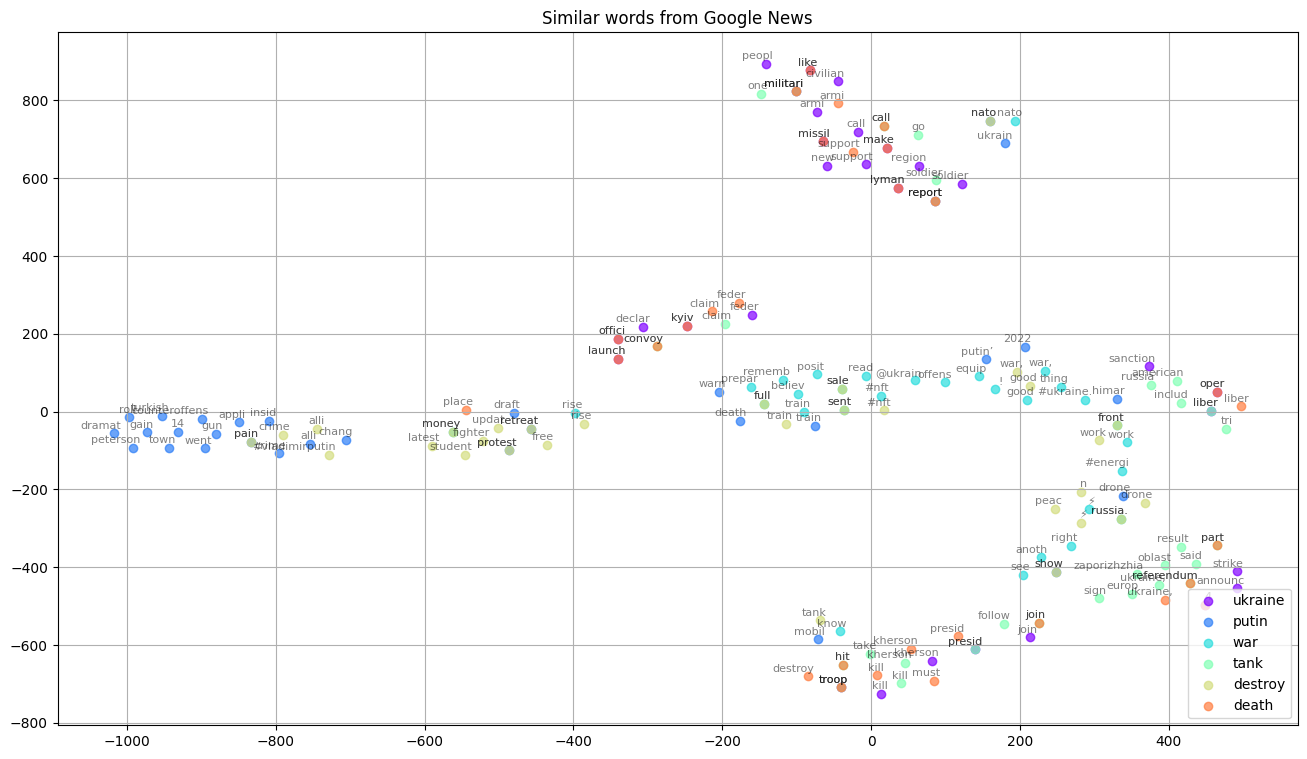

In [ ]:
import gensim
import re
import codecs
import multiprocessing
from gensim.models import Word2Vec

def preprocess_text(text):
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip()

def prepare_for_w2v(filename_from, filename_to, lang):
    raw_text = codecs.open(filename_from, "r", encoding='windows-1251').read()
    with open(filename_to, 'w', encoding='utf-8') as f:
        for sentence in nltk.sent_tokenize(raw_text, lang):
            print(preprocess_text(sentence.lower()), file=f)

training_data = sentences
model = Word2Vec(training_data, vector_size=200, window=5, min_count=5, workers=multiprocessing.cpu_count())


# Specify the words for which you want to find similar words
keys = ['ukraine', 'putin', 'war', 'tank', 'destroy', 'death', 'soldier']

embedding_clusters = []
word_clusters = []

# Find similar words for each key
for word in keys:
    if word in model.wv:
        embeddings = []
        words = []
        for similar_word, _ in model.wv.most_similar(word, topn=30):
            words.append(similar_word)
            embeddings.append(model.wv[similar_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)

# Now you can work with the embedding_clusters and word_clusters to visualize the similar words.
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

import matplotlib.pyplot as plt
import matplotlib.cm as cm



def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')




<ipython-input-53-998c28306193>:49: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


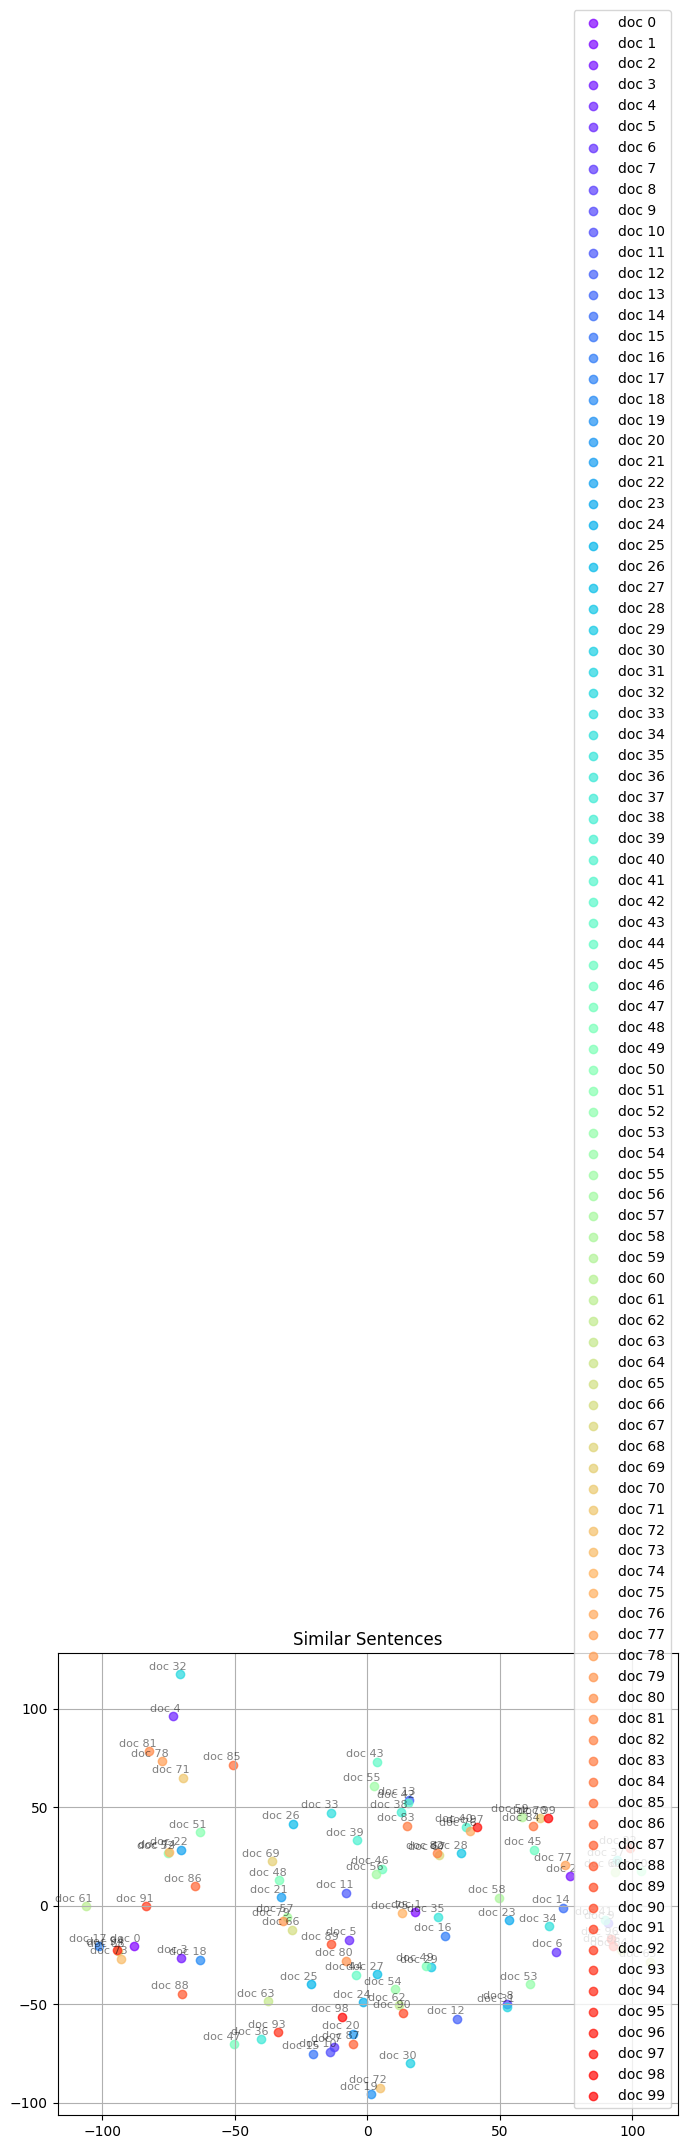

In [ ]:
import gensim
import re
import codecs
import multiprocessing
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

# Define your Word2Vec model and training data as you did before

training_data = sentences
model = Word2Vec(training_data, vector_size=200, window=5, min_count=5, workers=multiprocessing.cpu_count())



# Prepare a list of sentence embeddings by averaging word embeddings in each sentence
# Prepare a list of sentence embeddings by averaging word embeddings in each sentence
sentence_embeddings = []

# Prepare a list of sentence embeddings by averaging word embeddings in each sentence
sentence_embeddings = []

for sentence in training_data:
    valid_words = [word for word in sentence if word in model.wv]  # Filter valid words
    if valid_words:
        sentence_vector = np.mean([model.wv[word] for word in valid_words], axis=0)  # Calculate the mean vector
        sentence_embeddings.append(sentence_vector)



sentence_embeddings = np.array(sentence_embeddings)

# Perform t-SNE on the sentence embeddings
tsne_model_sent_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_sent_2d = np.array(tsne_model_sent_2d.fit_transform(sentence_embeddings))


# Plot the sentence cloud with a smaller size and limit the number of sentences
def tsne_plot_similar_sentences(title, labels, embeddings, a, filename=None):
    plt.figure(figsize=(8, 6))  # Adjust the figsize here (width, height)
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embedding, color in zip(labels, embeddings, colors):
        x = embedding[0]
        y = embedding[1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        plt.annotate(label, alpha=0.5, xy=(x, y), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

# Limit the number of sentences to be plotted
max_sentences = 100  # Set the maximum number of sentences to be plotted
sentence_labels = [f'doc {i}' for i in range(len(embeddings_sent_2d))][:max_sentences]
embeddings_sent_2d = embeddings_sent_2d[:max_sentences]

# Now you can create the sentence cloud with the adjusted size and limited sentences
tsne_plot_similar_sentences('Similar Sentences', sentence_labels, embeddings_sent_2d, 0.7, 'similar_sentences.png')


#**Lab3**


## Data prep

In [ ]:
#formatted_tweet tendra los tweets de Rus_Ukr_war_data.json
docs_path = 'Rus_Ukr_war_data.json'
formatted_tweets = []
with open(docs_path, 'r') as fp:
    for line in fp:
        try:
            tweet_data = json.loads(line)
            formatted_tweet = extract_tweet_info(tweet_data)
            formatted_tweets.append(formatted_tweet)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

In [ ]:
tweets_dictionary = {}

for tweet in formatted_tweets:
    clave = tweet[0]
    valor = tweet[1:]
    tweets_dictionary[clave] = valor
print(tweets_dictionary["1575917992390823936"])

['ALERT 🚨Poland preps anti-radiation tablets over nuclear threat\n\n#NATO #Putin #Russia #RussiaInvadedUkraine #Ukraine #UkraineRussiaWar', 'Fri Sep 30 18:38:23 +0000 2022', 'NATO, Putin, Russia, RussiaInvadedUkraine, Ukraine, UkraineRussiaWar', 0, 0, 'https://twitter.com/NEWS_ALL_TIME/status/1575917992390823936']


In [ ]:
docs_path = 'Rus_Ukr_war_data_ids.csv'
with open(docs_path) as fp:
    csvlines = fp.readlines()

resultado_diccionarios = {}

for linea in csvlines:
    partes = linea.strip().split('\t')
    if len(partes) == 2:
        resultado_diccionarios[partes[1]] = partes[0]
print(resultado_diccionarios)

{'1575918221013979136': 'doc_1', '1575918081461080065': 'doc_2', '1575917992390823936': 'doc_3', '1575917907774967809': 'doc_4', '1575917878410301441': 'doc_5', '1575917759707299841': 'doc_6', '1575917751360593920': 'doc_7', '1575917748978434053': 'doc_8', '1575917670049857538': 'doc_9', '1575917624298307585': 'doc_10', '1575916840286507009': 'doc_11', '1575916494990417920': 'doc_12', '1575916461620690977': 'doc_13', '1575916233102217217': 'doc_14', '1575915883385409537': 'doc_15', '1575915806319427621': 'doc_16', '1575915601012281344': 'doc_17', '1575915581278420992': 'doc_18', '1575915545869750272': 'doc_19', '1575915251169574912': 'doc_20', '1575915211336605698': 'doc_21', '1575915151890399232': 'doc_22', '1575914957362712576': 'doc_23', '1575914711388139520': 'doc_24', '1575914586791763968': 'doc_25', '1575914563886727169': 'doc_26', '1575914279295156224': 'doc_27', '1575914207052283925': 'doc_28', '1575914059031101452': 'doc_29', '1575913989195718657': 'doc_30', '15759138619573698

In [ ]:
tweets_relevant = []
for t in formatted_tweets:
    relevant_info = []
    relevant_info.append(resultado_diccionarios[t[0]])
    relevant_info.append(build_terms(t[1]))
    tweets_relevant.append(relevant_info)

'''for t in tweets_relevant:
  for w in t[-1]:
      if "#" in w and w[1:] not in t:
          t[-1].append(w[1:])'''

'for t in tweets_relevant:\n  for w in t[-1]:\n      if "#" in w and w[1:] not in t:\n          t[-1].append(w[1:])'

In [ ]:
index = create_index(tweets_relevant)

In [ ]:
docs_path = 'Rus_Ukr_war_data_ids.csv'
with open(docs_path) as fp:
    csvlines = fp.readlines()


resultado_diccionarios = {}
for linea in csvlines:
    partes = linea.strip().split('\t')
    if len(partes) == 2:
        resultado_diccionarios[partes[0]] = partes[1]

print(resultado_diccionarios)

{'doc_1': '1575918221013979136', 'doc_2': '1575918081461080065', 'doc_3': '1575917992390823936', 'doc_4': '1575917907774967809', 'doc_5': '1575917878410301441', 'doc_6': '1575917759707299841', 'doc_7': '1575917751360593920', 'doc_8': '1575917748978434053', 'doc_9': '1575917670049857538', 'doc_10': '1575917624298307585', 'doc_11': '1575916840286507009', 'doc_12': '1575916494990417920', 'doc_13': '1575916461620690977', 'doc_14': '1575916233102217217', 'doc_15': '1575915883385409537', 'doc_16': '1575915806319427621', 'doc_17': '1575915601012281344', 'doc_18': '1575915581278420992', 'doc_19': '1575915545869750272', 'doc_20': '1575915251169574912', 'doc_21': '1575915211336605698', 'doc_22': '1575915151890399232', 'doc_23': '1575914957362712576', 'doc_24': '1575914711388139520', 'doc_25': '1575914586791763968', 'doc_26': '1575914563886727169', 'doc_27': '1575914279295156224', 'doc_28': '1575914207052283925', 'doc_29': '1575914059031101452', 'doc_30': '1575913989195718657', 'doc_31': '1575913

## TF-IDF + Cosine similarity

In [ ]:
def TF_IDF_INDEX(lines,num_documents):
    """
    Implement the inverted index

    Argument:
    lines -- collection of Wikipedia articles

    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of documents where these keys appears in (and the positions) as values.
    """
    index = defaultdict(list)
    tf = defaultdict(list)
    df = defaultdict(int)  # document frequencies of terms in the corpus
    title_index = defaultdict(str)
    idf = defaultdict(float)
    for line_arr in lines:  # Remember, lines contain all documents: article-id | article-title | article-body

        page_id = line_arr[0]
        terms = line_arr[1] # page_title + page_text
        relevant_words = line_arr[1]

        ## ===============================================================
        ## create the index for the current page and store it in current_page_index (current_page_index)
        ## current_page_index ==> { ‘term1’: [current_doc, [list of positions]], ...,‘term_n’: [current_doc, [list of positions]]}

        ## Example: if the curr_doc has id 1 and his text is
        ##"web retrieval information retrieval":

        ## current_page_index ==> { ‘web’: [1, [0]], ‘retrieval’: [1, [1,4]], ‘information’: [1, [2]]}

        ## the term ‘web’ appears in document 1 in positions 0,
        ## the term ‘retrieval’ appears in document 1 in positions 1 and 4
        ## ===============================================================

        current_page_index = {}

        for position, term in enumerate(terms): # terms contains page_title + page_text. Loop over all terms
            try:
                # if the term is already in the index for the current page (current_page_index)
                # append the position to the corresponding list


                current_page_index[term][page_id].append(position)
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index[term]=[page_id, array('I',[position])] #'I' indicates unsigned int (int in Python)

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)

        #normalize term frequencies
        # Compute the denominator to normalize term frequencies (formula 2 above)
        # norm is the same for all terms of a document.
        norm = 0
        for term, posting in current_page_index.items():
            # posting will contain the list of positions for current term in current document.
            # posting ==> [current_doc, [list of positions]]
            # you can use it to infer the frequency of current term.
            norm += len(posting[1]) ** 2
        norm = math.sqrt(norm)

        # calculate the tf(dividing the term frequency by the above computed norm) and df weights
        for term, posting in current_page_index.items():
            # append the tf for current term (tf = term frequency in current doc/norm)
            tf[term].append(np.round(len(posting[1])/norm,4)) ## SEE formula (1) above
            #increment the document frequency of current term (number of documents containing the current term)
            df[term] += 1 # increment DF for current term

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)

        # Compute IDF following the formula (3) above. HINT: use np.log
        for term in df:
            idf[term] = np.round(np.log(float(num_documents/df[term]+1)), 4)

    return tf, df, idf, title_index


In [ ]:
tf, df, idf, title_index = TF_IDF_INDEX(tweets_relevant,len(tweets_relevant))
index = create_index(tweets_relevant)

In [ ]:
def rank_documents(terms, docs, index, idf, tf, title_index):
    """
    Perform the ranking of the results of a search based on the tf-idf weights

    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between page id and page title

    Returns:
    Print the list of ranked documents
    """

    # I'm interested only on the element of the docVector corresponding to the query terms
    # The remaining elements would became 0 when multiplied to the query_vector
    doc_vectors = defaultdict(lambda: [0] * len(terms)) # I call doc_vectors[k] for a nonexistent key k, the key-value pair (k,[0]len(terms)) will be automatically added to the dictionary
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query.
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})
    # HINT: use when computing tf for query_vector

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        ## Compute tfidf(normalize TF as done with documents)
        query_vector[termIndex]=(query_terms_count[term]/query_norm) * idf[term]
        #Generate doc_vectors for matching docs
        for doc_index, (doc, postings) in enumerate(index[term]):
            # Example of [doc_index, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....

            #tf[term][0] will contain the tf of the term "term" in the doc 26A
            if doc in docs:
                doc_vectors[doc][termIndex] = tf[term][doc_index] * idf[term]  # TODO: check if multiply for idf

    # Calculate the score of each doc
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine similarity
    # see np.dot

    doc_scores=[[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items()]
    score = doc_scores
    doc_scores.sort(reverse=True)
    result_docs = [x[1] for x in doc_scores]
    #print document titles instead if document id's
    #result_docs=[ title_index[x] for x in result_docs ]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index, idf, tf, title_index)
    #print ('\n'.join(result_docs), '\n')
    return result_docs, score

In [ ]:
def search_tf_idf(query, index, idf, tf, title_index):
    """
    output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query)
    docs = set()

    i=0

    for term in query:
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs=[posting[0] for posting in index[term]]

            if i == 0 : docs = docs.union(term_docs)
            else : docs = docs.intersection(term_docs)
            i+=1
        except:
            #term is not in index
            pass
    docs = list(docs)

    ranked_docs, doc_scores = rank_documents(query, docs, index, idf, tf, title_index)

    return ranked_docs, doc_scores

In [ ]:
print(docs)

[['doc_1560', 'doc_1188', 'doc_2161', 'doc_2925', 'doc_2749', 'doc_111', 'doc_2091', 'doc_846', 'doc_3257', 'doc_539', 'doc_1243', 'doc_654', 'doc_656', 'doc_131', 'doc_2308', 'doc_1365', 'doc_2099', 'doc_1314', 'doc_376', 'doc_101', 'doc_2838', 'doc_3188', 'doc_1643', 'doc_2636', 'doc_860', 'doc_3375', 'doc_1563', 'doc_403', 'doc_3507', 'doc_1179', 'doc_2186', 'doc_257', 'doc_1015', 'doc_1004', 'doc_2498', 'doc_739', 'doc_336', 'doc_2234', 'doc_1235', 'doc_781'], ['doc_1560', 'doc_1188', 'doc_2161', 'doc_2925', 'doc_2749', 'doc_111', 'doc_2091', 'doc_846', 'doc_3257', 'doc_539', 'doc_1243', 'doc_654', 'doc_656', 'doc_131', 'doc_2308', 'doc_1365', 'doc_2099', 'doc_1314', 'doc_376', 'doc_101', 'doc_2838', 'doc_3188', 'doc_1643', 'doc_2636', 'doc_860', 'doc_3375', 'doc_1563', 'doc_403', 'doc_3507', 'doc_1179', 'doc_2186', 'doc_257', 'doc_1015', 'doc_1004', 'doc_2498', 'doc_739', 'doc_336', 'doc_2234', 'doc_1235', 'doc_781'], ['doc_1560', 'doc_1188', 'doc_2161', 'doc_2925', 'doc_2749', 'd

In [ ]:

queries = []
queries.append("putin war")        #we create our 5 queries
queries.append("ukraine soldiers ")
queries.append("tank video")
queries.append("usa send")
queries.append("EU sanctions")

for query in queries:


  ranked_docs,_ = search_tf_idf(query, index, idf, tf, title_index)
  top = 20

  print("\n\n\n==========================================================\nTop {} results out of {} for the searched query {}:\n".format(top, len(ranked_docs), query))



  for d_id in ranked_docs[:top]:
      tweet_id = resultado_diccionarios[d_id]
      print("--> page_id= {} - tweet: {}".format(d_id, tweets_dictionary[tweet_id][0]))
      #print(d_id)




Top 20 results out of 20 for the searched query putin war:

--> page_id= doc_722 - tweet: Truss: We will ensure Putin loses this war https://t.co/l0tkgZbpef #Ukraine  #UkraineRussiaWar #UkraineUnderAttack #UkraineWarNews
--> page_id= doc_903 - tweet: #UkraineRussiaWar #UK #GreatBritain #Truss #SupportUkraine Truss: We will ensure putin loses this war https://t.co/MD9dZyLAZw
--> page_id= doc_194 - tweet: PERSONS WHO SUPPORT PUTIN AND THE WAR AGAINST UKRAINE #RussianMobilitraining. #Ukraine #UkraineRussiaWar #UkraineWar #Ukraine️ #Ukrainian #Internationalleaks  #RussianArmy #Russians  https://t.co/BItWUiziA1
--> page_id= doc_1648 - tweet: UKRAINE WAR LATEST | Putin to host Kremlin ceremony annexing parts of Ukraine
https://t.co/BwsSyNxhCO
#Ukraine #UkraineRussiaWar #Russia #RussiaUkraineWar #Putin
--> page_id= doc_3422 - tweet: Georgians rallied AGAINST "uncontrolled" migration from Russia, which has nearly doubled since putin declared a mobilization for the war in 🇺🇦.
#Georgia #Mobil

## OUR_Version + Cosine similarity

In [ ]:
def rank_interactions(terms, docs, index, formatted_tweets):
    doc_scores = []
    for tweet in formatted_tweets:
      if Diccionario_Num2ID[tweet[0]] in docs:

        doc_scores.append([(tweet[-3]+2*tweet[-2]),Diccionario_Num2ID[tweet[0]]])

    score = doc_scores
    doc_scores.sort(reverse=True)
    result_docs = [x[1] for x in doc_scores]
    #print document titles instead if document id's
    #result_docs=[ title_index[x] for x in result_docs ]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index, idf, tf, title_index)
    #print ('\n'.join(result_docs), '\n')
    return result_docs, score

In [ ]:
def search_Interactions(query, index, formatted_tweets):
    """
    output is the list of documents that contain all of the query terms.
    So, we will get the list of documents for each query term, and take the intersection of them.
    """
    query = build_terms(query)
    docs = set()

    i=0

    for term in query:
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs=[posting[0] for posting in index[term]]

            if i == 0 : docs = docs.union(term_docs)
            else : docs = docs.intersection(term_docs)
            i+=1
        except:
            #term is not in index
            pass
    docs = list(docs)


    ranked_docs, doc_scores = rank_interactions(query, docs, index, formatted_tweets)

    return ranked_docs, doc_scores


In [ ]:

queries = []
queries.append("putin war")        #we create our 5 queries
queries.append("ukraine soldiers ")
queries.append("tank video")
queries.append("usa send")
queries.append("EU sanctions")

for query in queries:
  ranked_docs, scores = search_Interactions(query, index, formatted_tweets)
  top = 20

  print("\n\n\n==========================================================\nTop {} results out of {} for the searched query {}:\n".format(top, len(ranked_docs), query))



  for i, d_id in enumerate(ranked_docs[:top]):
      tweet_id = resultado_diccionarios[d_id]
      print("--> page_id= {} - Score:{}- tweet: {}".format(d_id, scores[i][0], tweets_dictionary[tweet_id][0]))





Top 20 results out of 20 for the searched query putin war:

--> page_id= doc_1856 - Score:45- tweet: Putin may be losing on the battlefield but he's winning the war to ruin NATO countries economically.

"The European Systemic Risk Board...issued an unprecedented warning about severe risks to financial stability.
https://t.co/LunGzs2DHO
#UkraineRussiaWar
#economy #inflation
--> page_id= doc_531 - Score:16- tweet: UKRAINE WAR LATEST | NIKKEI ASIA BLOG

-- EU chief calls Russia's annexation illegal
-- Putin announces annexation of four Ukrainian regions

#Ukraine #UkraineRussiaWar #Russia #RussiaUkraineWar #Putin
https://t.co/0TtSQeoi5l
--> page_id= doc_903 - Score:9- tweet: #UkraineRussiaWar #UK #GreatBritain #Truss #SupportUkraine Truss: We will ensure putin loses this war https://t.co/MD9dZyLAZw
--> page_id= doc_3392 - Score:9- tweet: Proxy-RUS spokesperson reported the following.  Putin has already implemented the first phase.  I do not expect the use of nuclear weapons but this is

## Word2vec + Cosine similarity

In [ ]:
import gensim
import re
import codecs
import multiprocessing
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from sklearn.metrics.pairwise import cosine_similarity

def rank_docs_word2vec(query, index, sentences, model, tweets_relevant):
  # Pasa avector las frases haciendo la mean de las palabras de la frase
  sentence_embeddings = []
  IDembedings = []

  for sentence in sentences:
    for tweet in tweets_relevant:

      if sentence == tweet[0]:
        valid_words = [word for word in tweet[1] if word in model.wv]  # Filter valid words

        if valid_words:
            sentence_vector = np.mean([model.wv[word] for word in valid_words], axis=0)  # Calculate the mean vector

            IDembedings.append([tweet[0],sentence_vector])
            sentence_embeddings.append(sentence_vector)

  sentence_embeddings = np.array(sentence_embeddings)


  #Calculamos el valor de la query
  query_vector = [word for word in query if word in model.wv]  # Filter valid words
  if query_vector:
      query_vector = np.mean([model.wv[word] for word in query_vector], axis=0)  # Calculate the mean vector



  # Calculate the cosine similarity between the query vector and each doc vector
  doc_scores = [(doc, cosine_similarity([query_vector], [doc_vec])[0][0]) for doc, doc_vec in IDembedings]

  score = doc_scores
  doc_scores.sort(key=lambda x: x[1], reverse=True)

  result_docs = [x[0] for x in doc_scores]

  #print document titles instead if document id's
  #result_docs=[ title_index[x] for x in result_docs ]
  if len(result_docs) == 0:
      print("No results found, try an other query")
  #print ('\n'.join(result_docs), '\n')
  return result_docs, score


In [ ]:
def search_word2vec(query, index, sentences, model, tweets_relevant):
    """
    output is the list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query)
    docs = set()

    i=0
    for term in query:
        try:
            # store in term_docs the ids of the docs that contain "term"
            term_docs=[posting[0] for posting in index[term]]

            if i == 0 : docs = docs.union(term_docs)
            else : docs = docs.intersection(term_docs)
            i+=1
        except:
            #term is not in index
            pass

    docs = list(docs)

    ranked_docs, doc_scores = rank_docs_word2vec(query, index, docs, model, tweets_relevant)

    return ranked_docs, doc_scores

In [ ]:
#Usamos como trainig data del modelo los tweets
sentences = [text[1] for text in tweets_relevant]
words = []
for tw in sentences:
    for w in tw:
      words.append(w)

#Entrenamos el modelo
training_data = sentences
model = Word2Vec(training_data, vector_size=200, window=5, min_count=5, workers=multiprocessing.cpu_count())
#Definimos las queries que usaremos
queries = []
queries.append("putin war")        #we create our 5 queries
queries.append("ukraine soldiers ")
queries.append("tank video")
queries.append("usa send")
queries.append("EU sanctions")

for query in queries:
  ranked_docs,_ = search_word2vec(query, index, sentences, model, tweets_relevant)
  top = 20
  print("\n\n\n==========================================================\nTop {} results out of {} for the searched query {}:\n".format(top, len(ranked_docs), query))

  print(ranked_docs)

  for d_id in ranked_docs[:top]:
      tweet_id = resultado_diccionarios[d_id]
      print("--> page_id= {} - tweet: {}".format(d_id, tweets_dictionary[tweet_id][0]))




Top 20 results out of 20 for the searched query putin war:

['doc_3693', 'doc_2696', 'doc_400', 'doc_3392', 'doc_1856', 'doc_2963', 'doc_3331', 'doc_3422', 'doc_531', 'doc_1100', 'doc_247', 'doc_903', 'doc_22', 'doc_1348', 'doc_3204', 'doc_189', 'doc_722', 'doc_1648', 'doc_1862', 'doc_194']
--> page_id= doc_3693 - tweet: #UkraineRussiaWar I am not pro Russian but from before the war began I saw the possibility of nuclear war with Russia if US got involved in Ukraine. For that reason I would not have involved US inthe war.(I have no influence. When Putin warns of using nukes, take him seriously.
--> page_id= doc_2696 - tweet: #UkraineRussiaWar 2. Those explosions where caused by the Russian Federation Navy Mini Submarine launching the subs torpedoes at the Nord Stream Pipeline. Putin ordered this so he could start a war with NATO and use his nuclear tipped missiles. He wants to start an energy war https://t.co/0unjeZRste
--> page_id= doc_400 - tweet: I know people have a really hard 